### Урок 2. Свёрточные нейронные сети (СНС)
### Домашнее задание
Реализовать и обучить (с нуля) СНС для задачи классификации изображений на датасете CIFAR-10 Библиотеки: [Python, Tensorflow]
### Подключение библиотек

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

#### Загрузка и подготовка датасета CIFAR-10

In [2]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
train_x = train_x.astype(np.float32) / 255
test_x = test_x.astype(np.float32) / 255

train_y = np.reshape(train_y, (-1)).astype(np.int32)
test_y = np.reshape(test_y, (-1)).astype(np.int32)


In [5]:
print(train_x.shape, train_x.dtype)
print(train_y.shape, train_y.dtype)
print(test_x.shape, test_x.dtype)
print(test_y.shape, test_y.dtype)

(50000, 32, 32, 3) float32
(50000,) int32
(10000, 32, 32, 3) float32
(10000,) int32


#### Визуализация датасета CIFAR-10

In [6]:
some_samples = train_x[:15, ...]
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

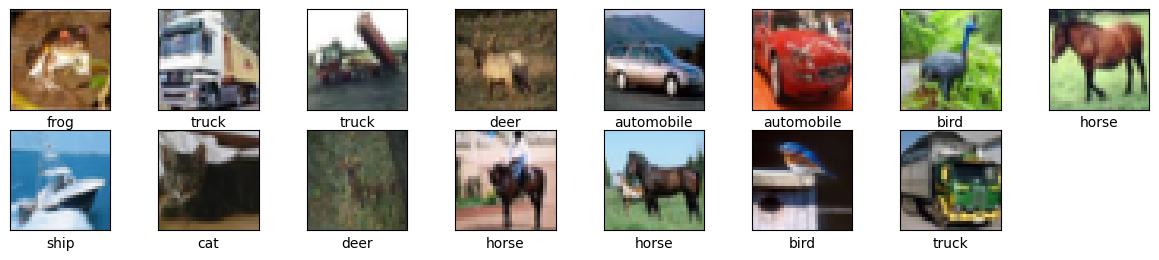

In [7]:
fig = plt.figure(figsize=(15, 6))
for j in range(some_samples.shape[0]):
  ax = fig.add_subplot(4, 8, j+1)
  ax.imshow(some_samples[j, :, :, :])
  plt.xticks([]), plt.yticks([])
  plt.xlabel(class_names[train_y[j]])

plt.show()

#### Создание модели CNN

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), (2, 2)),
    tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

#### Подготовка к обучению

In [9]:
model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#### Обучение модели

In [10]:
NUM_EPOCHS = 10

model.fit(train_x, train_y, epochs=NUM_EPOCHS)

Epoch 1/10
1563/1563 [==============================] - 19s 5ms/step - loss: 1.8460 - accuracy: 0.3350
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4753 - accuracy: 0.4735
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3131 - accuracy: 0.5337
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1968 - accuracy: 0.5778
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0988 - accuracy: 0.6156
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0116 - accuracy: 0.6466
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9398 - accuracy: 0.6727
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8753 - accuracy: 0.6958
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8128 - accuracy: 0.7172
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7

#### Оценка качества модели

In [11]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 3ms/step - loss: 0.9625 - accuracy: 0.6715


[0.9625205993652344, 0.671500027179718]

#### Пример инференса модели

In [12]:
sample = test_x[0, ...]
prediction = model(sample[None, ...])[0]
print(prediction)

tf.Tensor(
[0.00670445 0.00134371 0.00773181 0.5225279  0.02512418 0.42857578
 0.00498587 0.00131025 0.00104479 0.0006513 ], shape=(10,), dtype=float32)


#### Функция для инференса и отображения результата предсказания

In [13]:
def test_image(sample):

  prediction = model(sample[None, ...])[0]
  ans = np.argmax(prediction)

  fig = plt.figure(figsize=(12, 4))

  ax = fig.add_subplot(1, 2, 1)
  ax.imshow(sample[:,:,0], cmap='gray')
  plt.xticks([]), plt.yticks([])

  ax = fig.add_subplot(1, 2, 2)
  bar_list = ax.bar(np.arange(10), prediction, align='center')
  bar_list[ans].set_color('g')
  ax.set_xticks(np.arange(10))
  ax.set_xlim([-1, 10])
  ax.grid(True)

  plt.show()

  print('Predictred: {}'.format(ans))

#### Запуск предсказания для изображения случайной картинки из CIFAR-10

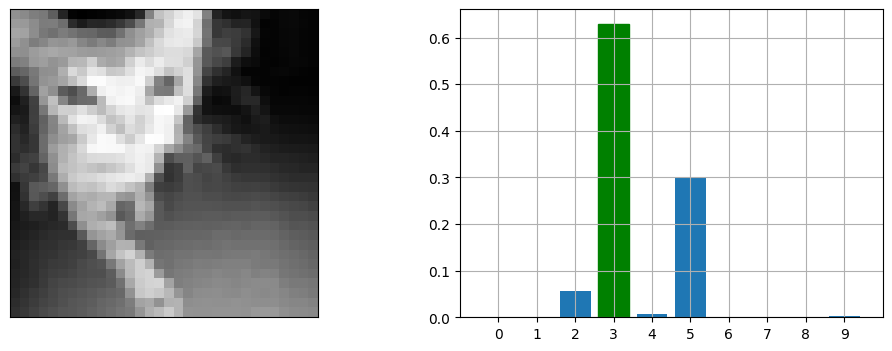

Predictred: 3
True Answer:cat


In [14]:
import random
idx = random.randint(0, test_x.shape[0])
sample = test_x[idx,...]
test_image(sample)

print(f'True Answer:{class_names[test_y[idx]]}')